In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [21]:
# 1. Loading Data

In [6]:
import os
for dirname, _, filenames in os.walk('C:/Users/yrkim/Desktop/Financial-Big-Data-Festival-main/Financial-Big-Data-Festival-main/Markov Regime-Switching Model/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/yrkim/Desktop/Financial-Big-Data-Festival-main/Financial-Big-Data-Festival-main/Markov Regime-Switching Model/kaggle/input\Composite leading indicator.csv


In [12]:
data = pd.read_csv("C:/Users/yrkim/Desktop/Financial-Big-Data-Festival-main/Financial-Big-Data-Festival-main/Markov Regime-Switching Model/kaggle/input/Composite leading indicator.csv")
data

,time,value
0,1955-01-01,101.51810
1,1955-02-01,101.88000
2,1955-03-01,102.17930
3,1955-04-01,102.38940
4,1955-05-01,102.50980
...,...,...
805,2022-02-01,99.96445
806,2022-03-01,99.82504
807,2022-04-01,99.67831
808,2022-05-01,99.52129


In [22]:
# 2. Spliting Data as Train and Validation

In [13]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 810
Train data length : 567
Validation data lenth : 243


In [15]:
train_data = data[:length_train].iloc[:,:2] 
train_data['time'] = pd.to_datetime(train_data['time'])  # converting to date time object
train_data

,time,value
0,1955-01-01,101.51810
1,1955-02-01,101.88000
2,1955-03-01,102.17930
3,1955-04-01,102.38940
4,1955-05-01,102.50980
...,...,...
562,2001-11-01,98.22350
563,2001-12-01,98.49922
564,2002-01-01,98.81783
565,2002-02-01,99.11930


In [16]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['time'] = pd.to_datetime(validation_data['time'])  # converting to date time object
validation_data

,time,value
567,2002-04-01,99.43970
568,2002-05-01,99.38090
569,2002-06-01,99.17819
570,2002-07-01,98.88600
571,2002-08-01,98.57394
...,...,...
805,2022-02-01,99.96445
806,2022-03-01,99.82504
807,2022-04-01,99.67831
808,2022-05-01,99.52129


In [23]:
# 3. Creating Train Dataset from Train split

In [18]:
dataset_train = train_data.value.values
dataset_train.shape

(567,)

In [19]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(567, 1)

In [24]:
# 4. Normalization / Feature Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(567, 1)

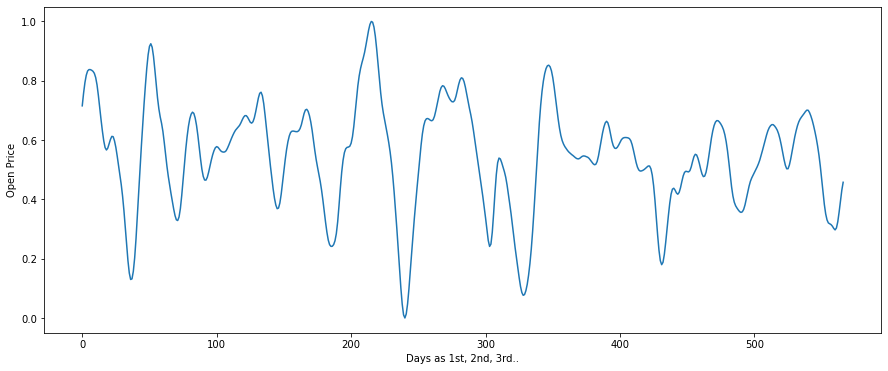

In [26]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [27]:
# 5. Creating X_train and y_train from Train data

In [28]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [29]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (517, 50)
Shape of y_train before reshape : (517,)


In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (517, 50, 1)
Shape of y_train after reshape : (517, 1)


In [31]:
X_train[0]

array([[0.71547673],
       [0.75843237],
       [0.79395772],
       [0.8188955 ],
       [0.83318635],
       [0.83770862],
       [0.8376374 ],
       [0.83548903],
       [0.83194005],
       [0.82506763],
       [0.81077677],
       [0.786112  ],
       [0.75026617],
       [0.708723  ],
       [0.66802256],
       [0.6300521 ],
       [0.59716177],
       [0.57459789],
       [0.56649104],
       [0.57293616],
       [0.58729823],
       [0.60244369],
       [0.61241405],
       [0.61148823],
       [0.59731607],
       [0.57532193],
       [0.54609927],
       [0.51426415],
       [0.48327412],
       [0.45016065],
       [0.41082164],
       [0.36269447],
       [0.30617438],
       [0.24677239],
       [0.1930357 ],
       [0.1515495 ],
       [0.1297512 ],
       [0.13187584],
       [0.15732638],
       [0.20309509],
       [0.26726267],
       [0.34381013],
       [0.42466501],
       [0.50456797],
       [0.58117358],
       [0.65457444],
       [0.72328685],
       [0.785

In [32]:
y_train[0]

array([0.91598783])

In [33]:
# 6. Creating RNN model

In [34]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
17/17 [==============================] - 3s 14ms/step - loss: 0.4964 - accuracy: 0.0039
Epoch 2/50
17/17 [==============================] - 0s 13ms/step - loss: 0.3479 - accuracy: 0.0019
Epoch 3/50
17/17 [==============================] - 0s 14ms/step - loss: 0.3012 - accuracy: 0.0039
Epoch 4/50
17/17 [==============================] - 0s 14ms/step - loss: 0.3175 - accuracy: 0.0039
Epoch 5/50
17/17 [==============================] - 0s 14ms/step - loss: 0.2702 - accuracy: 0.0019
Epoch 6/50
17/17 [==============================] - 0s 14ms/step - loss: 0.2511 - accuracy: 0.0039
Epoch 7/50
17/17 [==============================] - 0s 14ms/step - loss: 0.2093 - accuracy: 0.0039
Epoch 8/50
17/17 [==============================] - 0s 14ms/step - loss: 0.1789 - accuracy: 0.0039
Epoch 9/50
17/17 [==============================] - 0s 14ms/step - loss: 0.1580 - accuracy: 0.0019
Epoch 10/50
17/17 [==============================] - 0s 14ms/step - loss: 0.1568 - accuracy: 0.0019
Epoch 11/

In [ ]:
# 7. Evaluating Model

In [35]:
history.history["loss"]

[0.496356725692749,
 0.34791266918182373,
 0.3011583983898163,
 0.31754446029663086,
 0.2701699733734131,
 0.25113606452941895,
 0.20934227108955383,
 0.17894689738750458,
 0.1580422967672348,
 0.15682891011238098,
 0.16246552765369415,
 0.151239275932312,
 0.12343106418848038,
 0.10244482010602951,
 0.09491226077079773,
 0.09387669712305069,
 0.08533953875303268,
 0.0786948874592781,
 0.08014275878667831,
 0.06938917934894562,
 0.0667349323630333,
 0.06531627476215363,
 0.053132280707359314,
 0.062250737100839615,
 0.05922047421336174,
 0.05358339473605156,
 0.054313693195581436,
 0.04093446955084801,
 0.045511748641729355,
 0.04189316928386688,
 0.04020741209387779,
 0.03638014197349548,
 0.04269461706280708,
 0.03578091785311699,
 0.03067154809832573,
 0.03411339223384857,
 0.03586621582508087,
 0.026982055976986885,
 0.02741461619734764,
 0.02433745563030243,
 0.028532600030303,
 0.026440825313329697,
 0.021663252264261246,
 0.023790791630744934,
 0.02169448882341385,
 0.0246678348

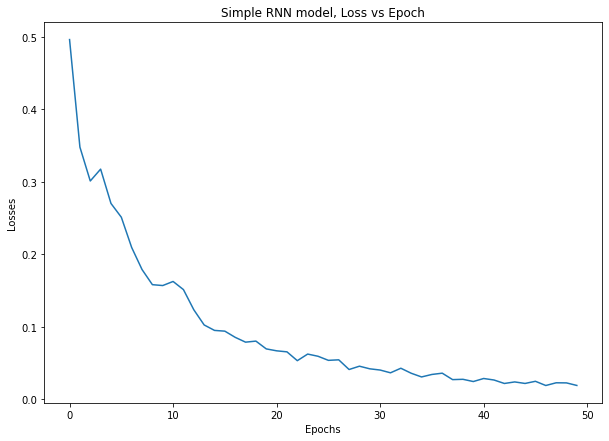

In [36]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

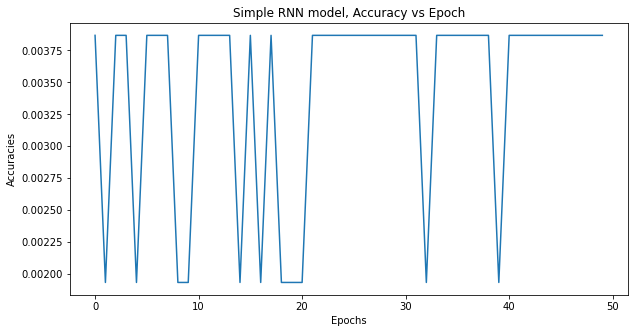

In [37]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [38]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

(517, 1)

In [39]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(517, 1)

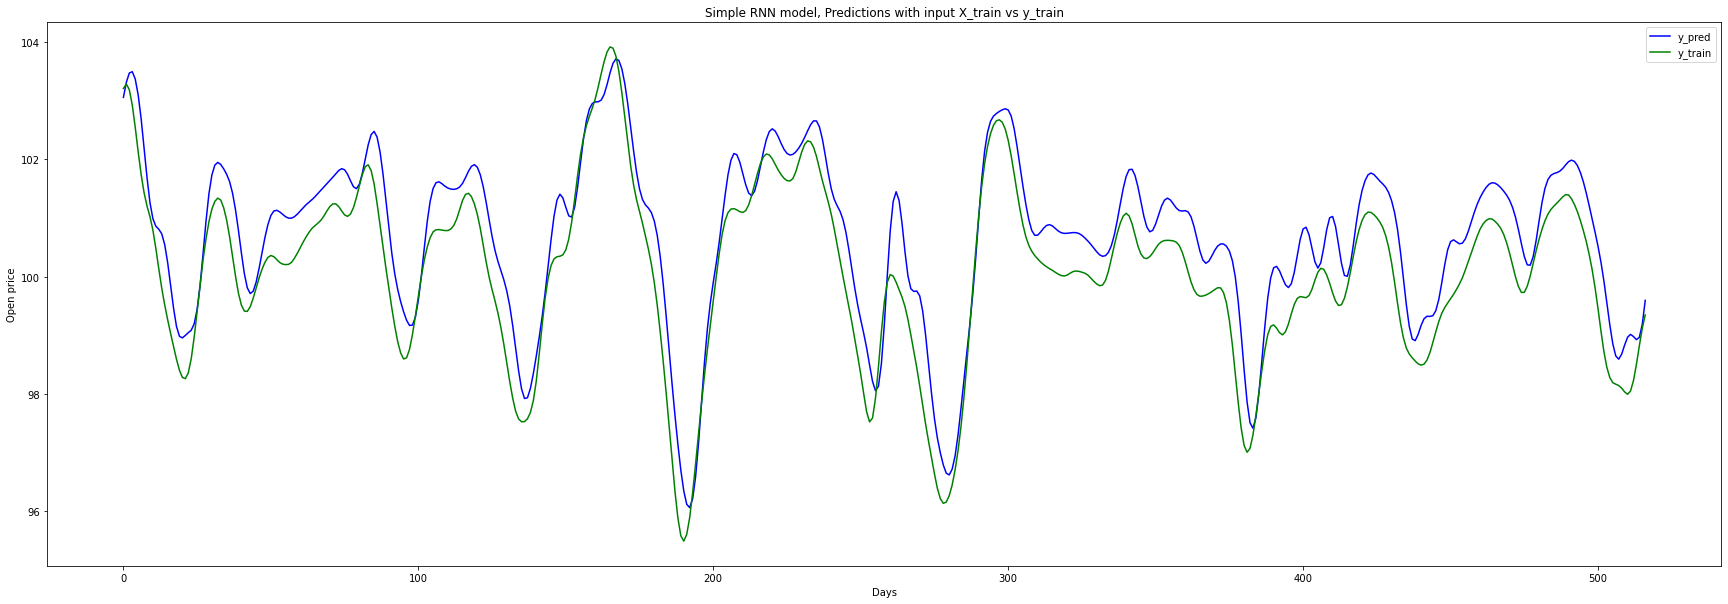

In [40]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [ ]:
# 8. Creating Test Dataset from Validation Data

In [42]:
dataset_validation = validation_data.value.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (243, 1)


In [43]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [44]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [45]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (193, 50)
Shape of y_test before reshape : (193,)


In [46]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [47]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (193, 50, 1)
Shape of y_test after reshape : (193, 1)


In [48]:
# 9. Evaluating with Validation Data

In [49]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

Shape of y_pred_of_test : (193, 1)


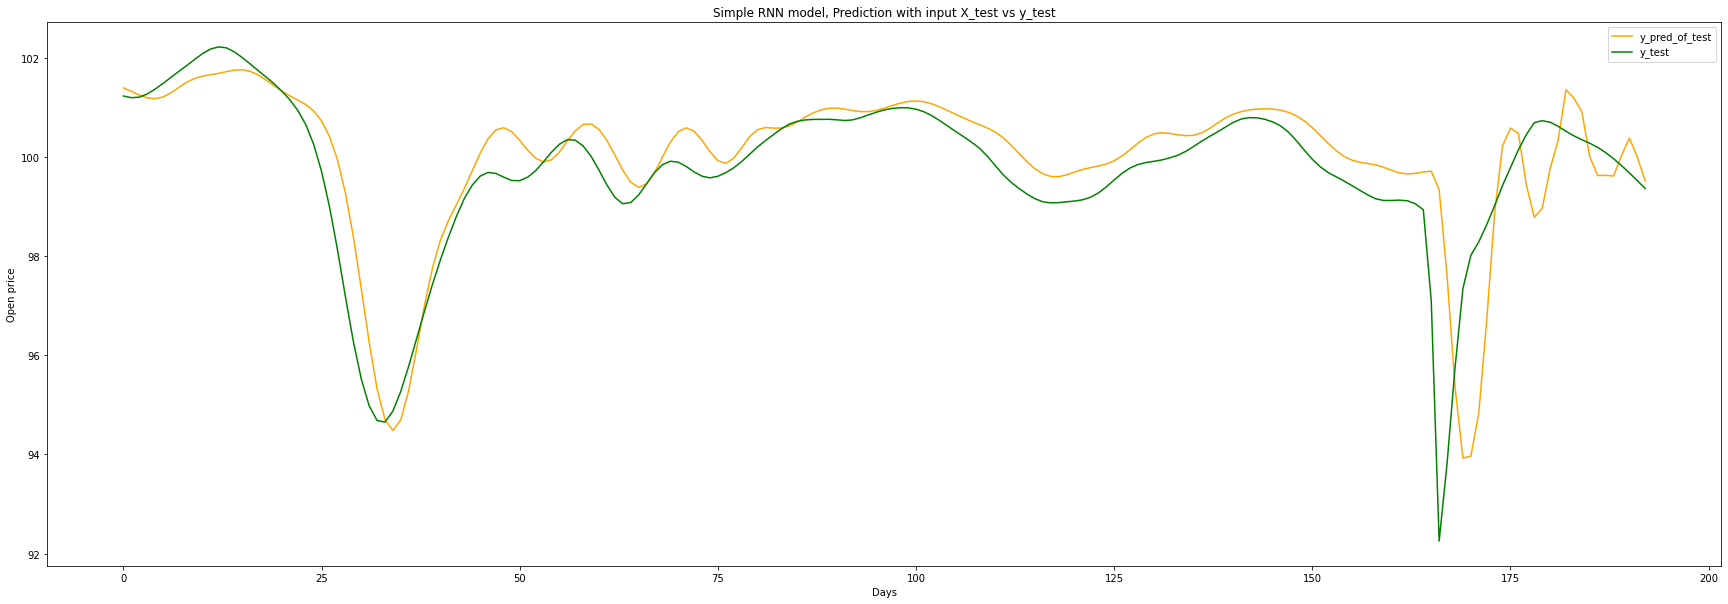

In [50]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

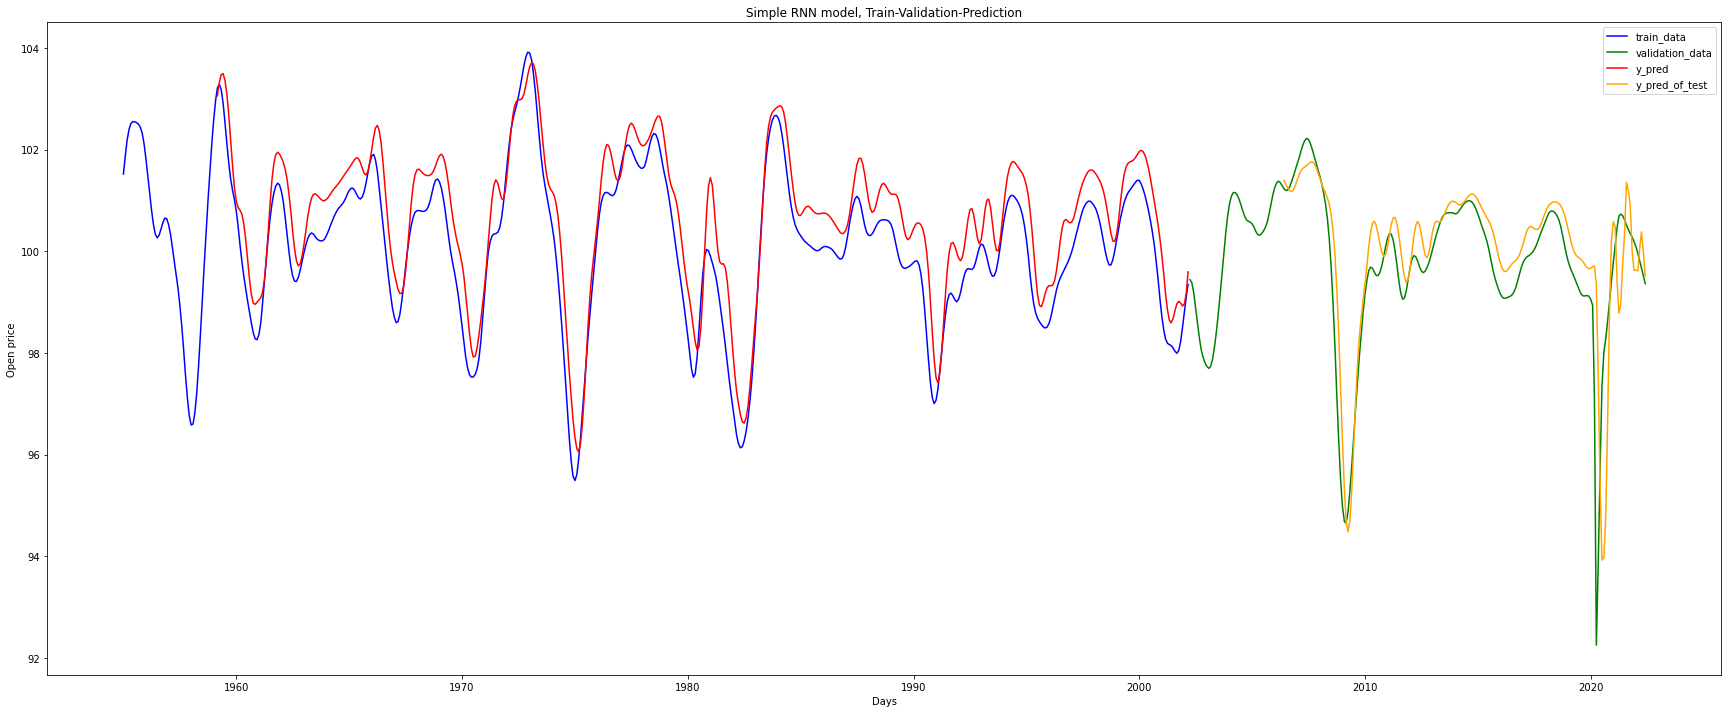

In [52]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.time, train_data.value, label = "train_data", color = "b")
plt.plot(validation_data.time, validation_data.value, label = "validation_data", color = "g")
plt.plot(train_data.time.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.time.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [53]:
# 10. Creating LSTM Model

In [54]:
y_train = scaler.fit_transform(y_train)

In [55]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
52/52 [==============================] - 4s 14ms/step - loss: 0.0292 - accuracy: 0.0019
Epoch 2/10
52/52 [==============================] - 1s 14ms/step - loss: 0.0084 - accuracy: 0.0039
Epoch 3/10
52/52 [==============================] - 1s 14ms/step - loss: 0.0056 - accuracy: 0.0039
Epoch 4/10
52/52 [==============================] - 1s 14ms/step - loss: 0.0043 - accuracy: 0.0039
Epoch 5/10
52/52 [==============================] - 1s 14ms/step - loss: 0.0036 - accuracy: 0.0039
Epoch 6/10
52/52 [==============================] - 1s 14ms/step - loss: 0.0032 - accuracy: 0.0039
Epoch 7/10
52/52 [==============================] - 1s 14ms/step - loss: 0.0023 - accuracy: 0.0039
Epoch 8/10
52/52 [==============================] - 1s 14ms/step - loss: 0.0015 - accuracy: 0.0039
Epoch 9/10
52/52 [==============================] - 1s 14ms/step - loss: 0.0013 - accuracy: 0.0039
Epoch 10/10
52/52 [==============================] - 1s 14ms/step - loss: 0.0011 - accuracy: 0.0039


In [56]:
# 11. Evaluating LSTM Model

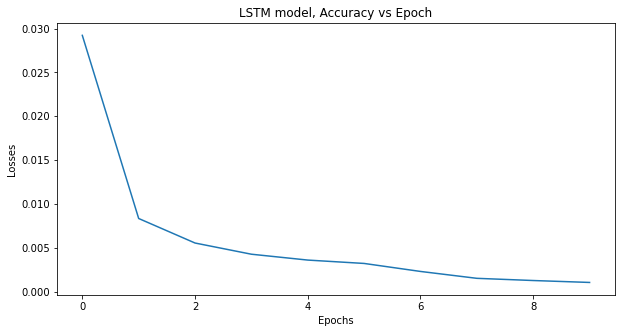

In [57]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

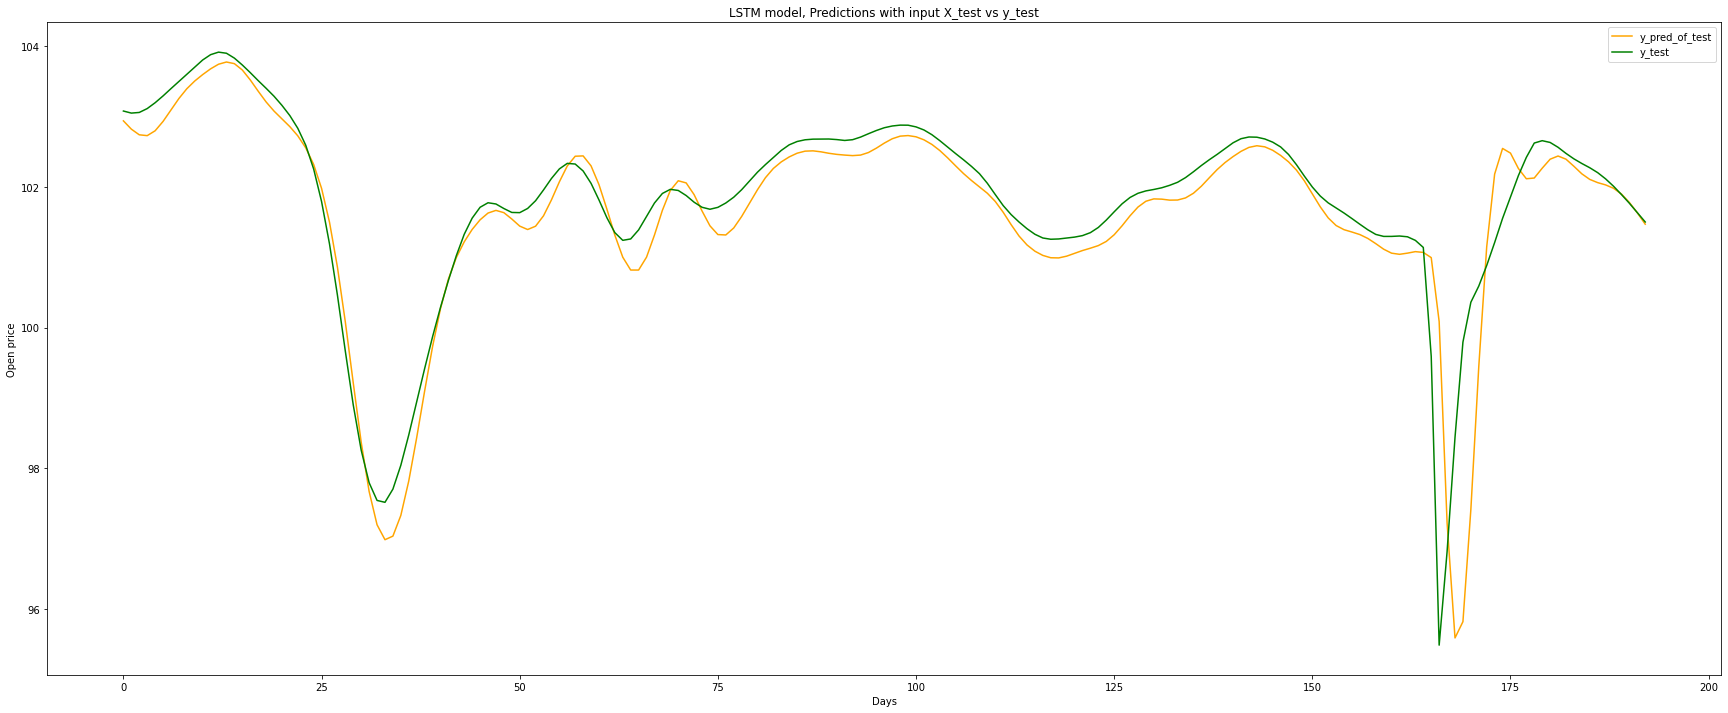

In [58]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [59]:
# 12. Future price prediction

In [60]:
data.iloc[-1]

time     2022-06-01
value       99.3638
Name: 809, dtype: object

In [62]:
X_input = data.iloc[-time_step:].value.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[1.        ],
        [0.99653194],
        [0.99024021],
        [0.98083191],
        [0.96596376],
        [0.94578806],
        [0.92326907],
        [0.90192524],
        [0.88415024],
        [0.87072555],
        [0.86071855],
        [0.85068459],
        [0.83979534],
        [0.82858037],
        [0.81774266],
        [0.80864134],
        [0.80468118],
        [0.80471048],
        [0.80546619],
        [0.80395477],
        [0.79687804],
        [0.78295423],
        [0.5684064 ],
        [0.        ],
        [0.18386366],
        [0.40892347],
        [0.59661254],
        [0.67507165],
        [0.70699893],
        [0.74750264],
        [0.7926074 ],
        [0.84015855],
        [0.8822885 ],
        [0.92448758],
        [0.960293  ],
        [0.98849446],
        [0.99314589],
        [0.98965439],
        [0.98015236],
        [0.96811958],
        [0.95737561],
        [0.94822508],
        [0.93988298],
        [0.93022863],
        [0.91796153],
        [0

In [64]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 1/7/2022      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 1/7/2022 :", LSTM_prediction[0,0])

Simple RNN, Open price prediction for 1/7/2022      : 99.03498
LSTM prediction, Open price prediction for 1/7/2022 : 99.10073
